<a href="https://colab.research.google.com/github/ekolonsky/202208_metahne_lab/blob/main/FEJ_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment with Laser Methane Mini 22-23/08/2022 and 2/09/2022

photo_5197655296204455041_y.jfif

In [ ]:
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/ekolonsky/202208_metahne_lab/main/dataset.txt'
df = pd.read_csv(url,  sep='\t', decimal=',')


In [ ]:
df

Num  Source  Distance  LR_raw  ppmm_raw   LR
0        1   Valve      15.0     0.0        32    0
1        1   Valve      15.0     0.0        23    0
2        1   Valve      15.0     0.0        68    0
3        1   Valve      15.0     0.0        93    0
4        1   Valve      15.0     0.0        96    0
...    ...     ...       ...     ...       ...  ...
11565  100  Flange      30.0   100.0        50  100
11566  100  Flange      30.0   100.0        14  100
11567  100  Flange      30.0   100.0       170  100
11568  100  Flange      30.0   100.0       199  100
11569  100  Flange      30.0   100.0       114  100

[11570 rows x 6 columns]

## Сглаживание

In [ ]:
import more_itertools
import numpy as np
def max_mean(values, sliding_window_size=5):
  chunks = list(more_itertools.windowed(values, sliding_window_size))
  means = list(map(np.mean, chunks))
  return np.max(means)

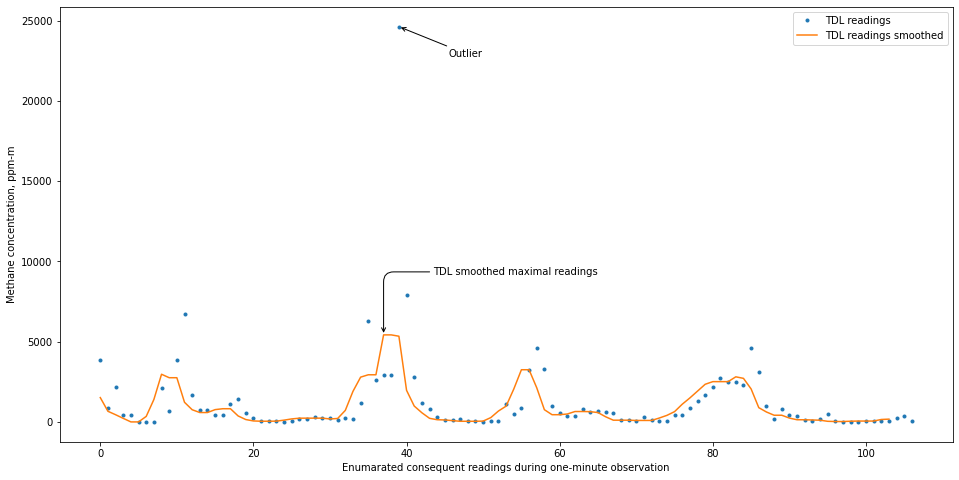

In [ ]:
import matplotlib.pyplot as plt
width=4
Num=27 # observation Num
ppms = list(df[df.Num==Num]['ppmm_raw'])[width//2:-width//2]
smooth = list(map(np.median,list(more_itertools.windowed(ppms, width)))) 


fig, ax = plt.subplots(figsize=(16, 8))


ax.plot(ppms, '.', label='TDL readings')
outliery = max(ppms)
outlierx = ppms.index(outliery)
ax.annotate('Outlier', xy=(outlierx, outliery), xycoords='data',
    xytext=(50, -30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->"))

ax.plot(smooth, label='TDL readings smoothed')
smoothy = max(smooth)
smoothx = smooth.index(smoothy)
ax.annotate('TDL smoothed maximal readings', xy=(smoothx, smoothy), xycoords='data',
    xytext=(50, 60), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax.set_ylabel('Methane concentration, ppm-m')
ax.set_xlabel('Enumarated consequent readings during one-minute observation')
ax.legend()

In [ ]:
records = []
for num in df.Num.unique():
  ppms = df[df.Num==num]['ppmm_raw']
  maxmean = max_mean(ppms,4)
  LR = df[df.Num==num]['LR'].unique()[0]
  D = df[df.Num==num]['Distance'].unique()[0]
  VF = df[df.Num==num]['Source'].unique()[0]
  record = [LR, D, VF, maxmean]
  records.append(record)
data = pd.DataFrame(records, columns = ['LeakRate', 'Distance','Source', 'ppmm'])
data['zero_leak'] = data.LeakRate ==0


In [ ]:
data

LeakRate  Distance  Source     ppmm  zero_leak
0          0      15.0   Valve   127.50       True
1          3      10.0   Valve   106.75      False
2          3      15.0   Valve   113.00      False
3          6      10.0   Valve   163.25      False
4          6      15.0   Valve   128.00      False
..       ...       ...     ...      ...        ...
90       100      12.0  Flange  2580.75      False
91       100      15.0  Flange   956.75      False
92       100      20.0  Flange   857.50      False
93       100      25.0  Flange   626.00      False
94       100      30.0  Flange  1112.75      False

[95 rows x 5 columns]

Text(0, 0.5, 'TDL readings, ppm × m')

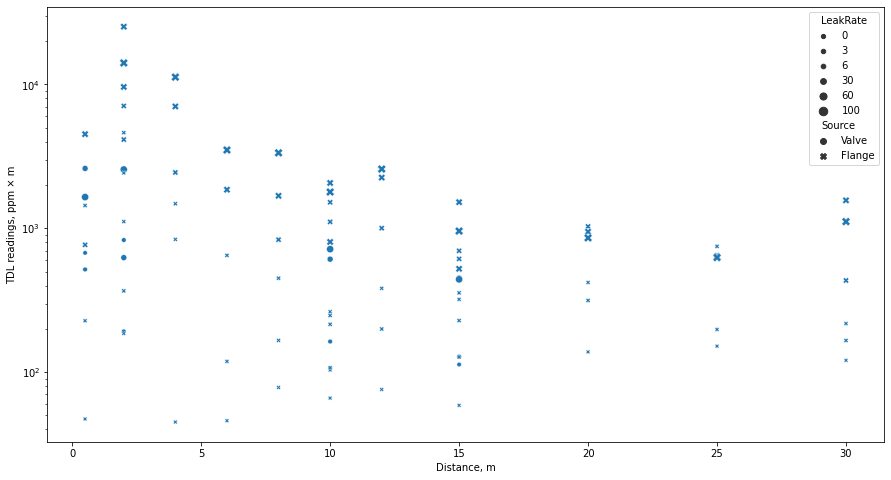

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plt.yscale('log')
g  = sns.scatterplot(data=data, x="Distance", y="ppmm", style='Source', size='LeakRate')
plt.xlabel("Distance, m")
plt.ylabel("TDL readings, ppm × m")


In [ ]:
ppm_zeroleak = data[data.zero_leak]['ppmm'].max()
ppm_leak = ppm_zeroleak
for lrt in [0, 3, 6, 30, 60]:
  y = data[data.LeakRate == lrt]['ppmm'].min()
  print(lrt, y)
  if ppm_leak < y:
    ppm_leak = y
print(ppm_zeroleak, ppm_leak, (ppm_leak + ppm_zeroleak)/2)

0 45.0
3 106.75
6 128.0
30 433.75
60 441.25
185.75 441.25 313.5


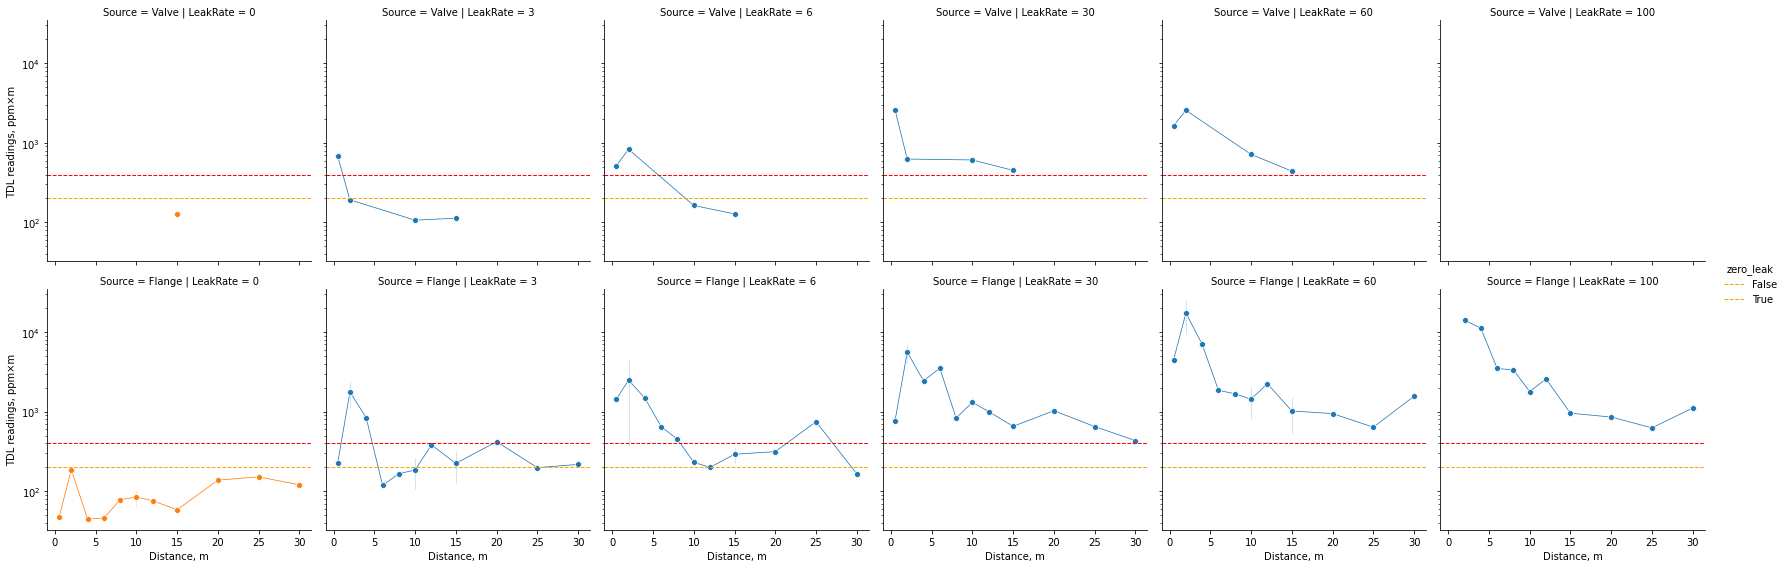

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

g = sns.FacetGrid(data, row='Source', col='LeakRate', hue='zero_leak',  height=4)
g.map_dataframe(sns.lineplot,  "Distance", "ppmm", marker='o', size=100)
g.set_axis_labels("Distance, m", "TDL readings, ppm×m").set(yscale = 'log')
g.refline(y = 400, color = "red", lw = 1)
g.refline(y = 200, color = "orange", lw = 1)
g.add_legend()

In [ ]:
data['Leak ≥ 30 g/h'] =  data.LeakRate >= 30 

In [ ]:
filter_method = lambda x: '30 g/h and over' if x >= 30 else '3 - 6 g/h' if (x > 0 and x < 30) else 'No emission' if x == 0 else None
data['Leaks'] = data['LeakRate'].apply(filter_method)
data

LeakRate  Distance  Source     ppmm  zero_leak  Leak ≥ 30g/h  \
0          0      15.0   Valve   127.50       True         False   
1          3      10.0   Valve   106.75      False         False   
2          3      15.0   Valve   113.00      False         False   
3          6      10.0   Valve   163.25      False         False   
4          6      15.0   Valve   128.00      False         False   
..       ...       ...     ...      ...        ...           ...   
90       100      12.0  Flange  2580.75      False          True   
91       100      15.0  Flange   956.75      False          True   
92       100      20.0  Flange   857.50      False          True   
93       100      25.0  Flange   626.00      False          True   
94       100      30.0  Flange  1112.75      False          True   

    Leak ≥ 30 g/h      Leak category    Leak, g/h            Leaks  
0           False        No emission  No emission      No emission  
1           False  0 < Leak < 30 g/h  0< leak <30        3 - 6 g/h  
2           False  0 < Leak < 30 g/h  0< leak <30        3 - 6 g/h  
3           False  0 < Leak < 30 g/h  0< leak <30        3 - 6 g/h  
4           False  0 < Leak < 30 g/h  0< leak <30        3 - 6 g/h  
..            ...                ...          ...              ...  
90           True      Leak ≥ 30 g/h    leak ≥ 30  30 g/h and over  
91           True      Leak ≥ 30 g/h    leak ≥ 30  30 g/h and over  
92           True      Leak ≥ 30 g/h    leak ≥ 30  30 g/h and over  
93           True      Leak ≥ 30 g/h    leak ≥ 30  30 g/h and over  
94           True      Leak ≥ 30 g/h    leak ≥ 30  30 g/h and over  

[95 rows x 10 columns]

Text(17, -50, 'No emission threshold')

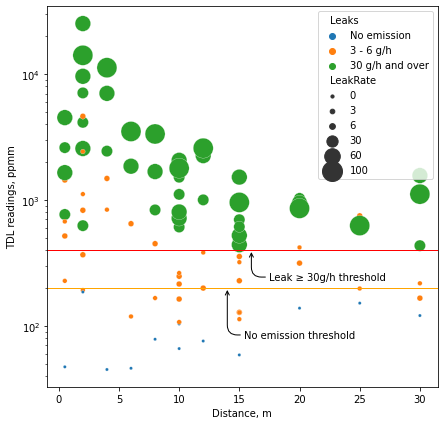

In [ ]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(data=data, x="Distance", y="ppmm", hue='Leaks', 
                     hue_order = ['No emission', '3 - 6 g/h', '30 g/h and over'], size='LeakRate', sizes=(10, 400))
ax.set(yscale="log")
#g.set("Distance, m", "RMLD readings, ppmm").set(yscale = 'log')
plt.xlabel('Distance, m')
plt.ylabel('TDL readings, ppmm')
ax.axhline(400, color = "red", lw = 1, label='400 ppm×m')

ax.annotate('Leak ≥ 30g/h threshold', xy=(16, 400), xycoords='data',
    xytext=(18, -30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))


ax.axhline(200, color = "orange", lw = 1, label='200 ppm×m')

ax.annotate('No emission threshold', xy=(14, 200), xycoords='data',
    xytext=(17, -50), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=-90,rad=10"))

In [ ]:
def accuracy(RDML_treshold, LR_treshold, Distance_max=50):
  TN, TP, FN, FP = 0,0,0,0
  for index, row in data.iterrows():
    distance = row['Distance']
    ppmm = row['ppmm']
    LR = row['LeakRate']
    if distance > Distance_max:
      continue
    actual = LR >= LR_treshold
    predictor = ppmm >= RDML_treshold
    if actual and predictor:
      TP += 1
    if actual and not predictor:
      FN += 1
    if not actual and predictor:
      FP += 1
    if not actual and not predictor:
      TN += 1
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  return precision, recall
      

In [ ]:
accuracy(300, 30)

(0.71875, 1.0)

In [ ]:
def find_ppmm_threshold(lrt, dist):
  P_max = 0
  ppmt_optimal = 0
  for ppmt in [200, 250, 300, 350, 400, 450, 500, 550, 600]:
    P, R = accuracy(ppmt, lrt, dist)
    if R < 1:  # recall should be not less 1
      continue   
    if P_max < P:
      ppmt_optimal = ppmt
      P_max = P
  return P_max, ppmt_optimal
find_ppmm_threshold(30, 15)

(0.7708333333333334, 400)

In [ ]:
for lrt in [3, 6, 30, 60]:
  for d in [5, 10, 15, 20, 25, 30]:
    print(lrt, d, find_ppmm_threshold(lrt, d))

3 5 (0, 0)
3 10 (0, 0)
3 15 (0, 0)
3 20 (0, 0)
3 25 (0, 0)
3 30 (0, 0)
6 5 (0.8333333333333334, 250)
6 10 (0, 0)
6 15 (0, 0)
6 20 (0, 0)
6 25 (0, 0)
6 30 (0, 0)
30 5 (0.6363636363636364, 550)
30 10 (0.75, 550)
30 15 (0.7708333333333334, 400)
30 20 (0.7692307692307693, 400)
30 25 (0.7678571428571429, 400)
30 30 (0.7796610169491526, 400)
60 5 (0.36363636363636365, 550)
60 10 (0.4444444444444444, 550)
60 15 (0.4583333333333333, 400)
60 20 (0.46153846153846156, 400)
60 25 (0.4642857142857143, 400)
60 30 (0.4745762711864407, 400)


## Result #1: threshold 250 ppmm at distances up to 5m for leak definition threshold 6 g/h
## Result #2: threshold 400 ppmm at distances up to 30m for leak definition threshold 30 g/h